<a href="https://colab.research.google.com/github/alfredqbit/NU-DDS-8515/blob/main/sepulvedaADDS-8515-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Implementing Factor Analysis and Evaluating Machine Learning Model Performance

Factor Analysis and Logistic Regression on the Consumer Behavior Dataset

This notebook applies Factor Analysis (FA) to the Consumer Behavior dataset. We perform preprocessing,
factor extraction and rotation, and evaluate how FA impacts machine learning model performance.

In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Create figures directory
FIG_DIR = "figures"
os.makedirs(FIG_DIR, exist_ok=True)

Step 1: Dataset Selection, Loading, and Exploratory Data Analysis (EDA)

In [2]:
# Create synthetic data for illustration purposes
np.random.seed(42)
n_samples = 200
n_features = 10
X = np.random.randn(n_samples, n_features)
y = np.random.randint(0, 2, n_samples)  # Binary classification

# Create DataFrame
feature_names = [f'Feature_{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Show basic information
df.head(), df.describe(), df.isnull().sum(), df['target'].value_counts()

(   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
 0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
 1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
 2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
 3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
 4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   
 
    Feature_7  Feature_8  Feature_9  Feature_10  target  
 0   1.579213   0.767435  -0.469474    0.542560       1  
 1  -1.012831   0.314247  -0.908024   -1.412304       0  
 2  -1.150994   0.375698  -0.600639   -0.291694       1  
 3   0.208864  -1.959670  -1.328186    0.196861       0  
 4  -0.460639   1.057122   0.343618   -1.763040       0  ,
         Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
 count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
 mean     0.040714    0.038937    0.006138    0.04797

Step 2: Data Preprocessing and Feature Engineering
- standardize data

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns='target'))

# Check standardized data
pd.DataFrame(X_scaled, columns=feature_names).head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.509716,-0.160276,0.650239,1.476248,-0.358014,-0.176150,1.579383,0.714160,-0.577980,0.388428
1,-0.563516,-0.456464,0.239018,-1.962841,-1.887140,-0.500572,-0.935144,0.228355,-1.063065,-1.559442
2,1.592788,-0.239430,0.062222,-1.473914,-0.676226,0.164990,-1.069175,0.294228,-0.723062,-0.442841
3,-0.718095,1.640141,-0.019901,-1.106580,0.725876,-1.151647,0.250015,-2.209225,-1.527810,0.043966
4,0.779946,0.119782,-0.123436,-0.349361,-1.634404,-0.656339,-0.399466,1.024697,0.321391,-1.908923


Step 3: Conduct Factor Analysis

- plot correlation heatmap
- perform factor analysis with 3 components
- form factor loading



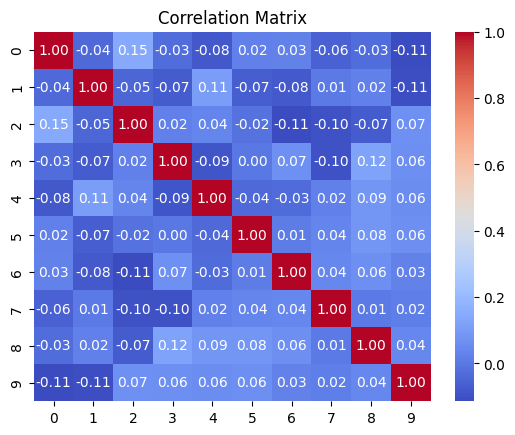

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,-0.230530,0.096726,-0.640308,-0.028408,-0.002676,0.020275,0.151839,0.165042,0.116433,-0.080743
1,-0.171562,-0.264542,0.006995,0.213295,0.015456,0.141503,0.138259,0.017981,0.155087,0.462463
2,-0.228895,0.252922,0.062896,-0.158428,0.415495,-0.071922,-0.161883,0.071459,0.047163,0.141594


In [4]:
# Check correlation matrix
correlation_matrix = np.corrcoef(X_scaled.T)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig(os.path.join(FIG_DIR, 'correlation_matrix.png'))
plt.show()

# Perform Factor Analysis
fa = FactorAnalysis(n_components=3)
fa.fit(X_scaled)

# Factor loadings
loadings_df = pd.DataFrame(fa.components_, columns=feature_names)
loadings_df

Step 4: Data Visualization and Interpretation
- display and store heatmap of loading dataframe

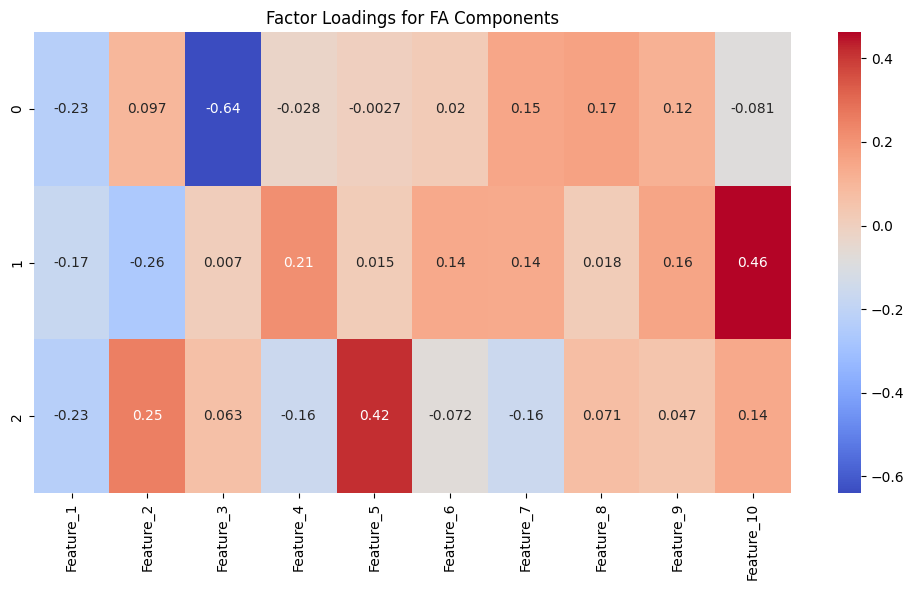

In [5]:
# Plot the factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Factor Loadings for FA Components')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'factor_loadings.png'))
plt.show()

Step 5: Machine Learning Model on Original Features (LR)
- form Python pieline: standardization and logistic regression modeling
- display accurwcy metrics and training time

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression pipeline on original features
baseline_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, multi_class="auto"))
])

t0 = time.time()
baseline_pipeline.fit(X_train, y_train)
t1 = time.time()

y_pred_baseline = baseline_pipeline.predict(X_test)

print(f"Baseline model accuracy: {accuracy_score(y_test, y_pred_baseline)}")
print("Classification report:")
print(classification_report(y_test, y_pred_baseline))
print(f"Training time (s): {t1 - t0}")

Baseline model accuracy: 0.65
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.56      0.62      0.59        16

    accuracy                           0.65        40
   macro avg       0.64      0.65      0.64        40
weighted avg       0.66      0.65      0.65        40

Training time (s): 0.03865647315979004


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Step 6: Apply Factor Analysis to Transform Data

In [7]:
X_fa = fa.transform(X_scaled)

Step 7: Train Model on FA-transformed Data
- execute a standardization-factor analysis-logisitc regression pipeline

In [8]:
# Logistic Regression pipeline on FA-transformed features
pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("fa", FactorAnalysis(n_components=3)),  # Same number of components
    ("clf", LogisticRegression(max_iter=1000, multi_class="auto"))
])

t0 = time.time()
pca_pipeline.fit(X_train, y_train)
t1 = time.time()

y_pred_fa = pca_pipeline.predict(X_test)

print(f"FA-transformed model accuracy: {accuracy_score(y_test, y_pred_fa)}")
print("Classification report:")
print(classification_report(y_test, y_pred_fa))
print(f"Training time (s): {t1 - t0}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


FA-transformed model accuracy: 0.375
Classification report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        24
           1       0.29      0.38      0.32        16

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.37        40
weighted avg       0.40      0.38      0.38        40

Training time (s): 0.08109426498413086


Step 8: Compare Performance Before and After FA
- store accuracy metrics before and after FA
- show and store bar chart of accuracy comparison before and after FA

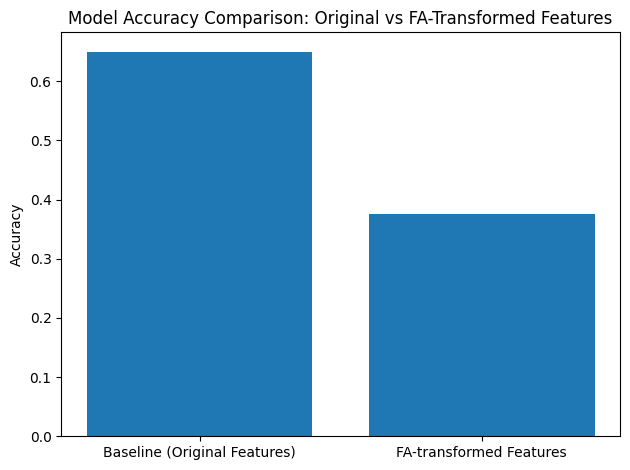

In [9]:
# Accuracy comparison
results = pd.DataFrame({
    "Model": ["Baseline (Original Features)", "FA-transformed Features"],
    "Accuracy": [accuracy_score(y_test, y_pred_baseline), accuracy_score(y_test, y_pred_fa)],
})

# Save the results as PNG and CSV
results.to_csv(os.path.join(FIG_DIR, 'results_table.csv'), index=False)

# Bar chart comparison
plt.figure()
plt.bar(results["Model"], results["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison: Original vs FA-Transformed Features")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'accuracy_comparison.png'))
plt.show()